In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Decision trees
Imagine you have a dataset of fruits: {color, texture, taste, size} and you want to predict the kind of fruit

Sample data: {red, shiny, sweet, small}

Classify a pattern through a sequence of questions. This can be done in a true/false or yes/no style.

Is the fruit green? No, go one way. Yes, go the other way.

This sequence of questions is displayed in a directed decision tree

Terms used:
* root node (the starting point of the questions)
* links or branches (different paths we can take in the decision tree)
* nodes (the decisions along the way)
* leaf or terminal nodes (the class that we predict)

Benefits of decision trees
* Interpretability: a tree can be expressed as a logical expression
* Rapid classification: a sequence of simple queries
* Higher accuracy & speed

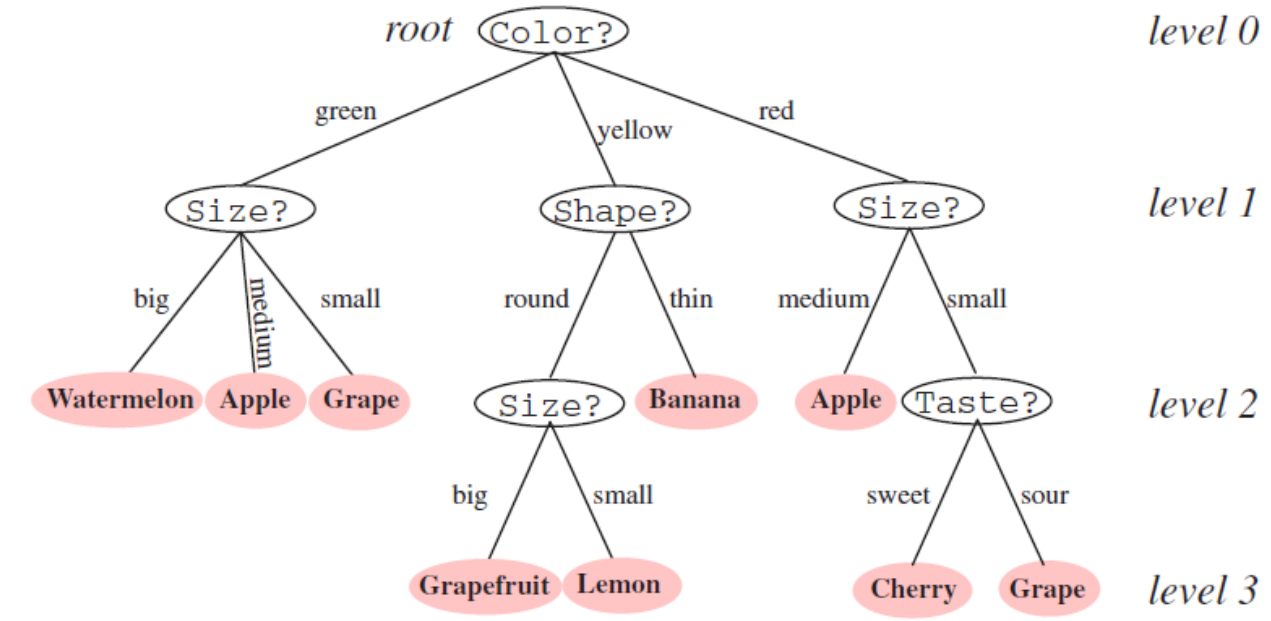
Source : https://www.cse.msu.edu/~cse802/DecisionTrees.pdf

Following the path -> red -> small -> sweet, we can classify our fruit as a cherry

## Entropy and information gain
In the tree above, these splits were already made for us. But how can we decide what we should split and where we should split?

A good split is one where the randomness/entropy/disorder decreases and  both sides of the splits get more "pure" to one class.

**Entropy H**: A measurement for the randomness/entropy/disorder of a dataset.

$H=\large\sum^N_{i=1}p_ilog_2(\frac{1}{p_i})$

$H=-\large\sum^N_{i=1}p_ilog_2(p_i)$

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


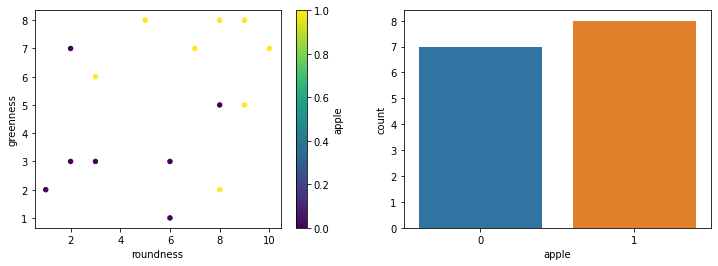

In [2]:
# Read in data
data=pd.read_csv("data/apples_non_linear.csv")

# Show the first rows (display because there is other code beneath this, otherwise it would not show)
display(data.head())

# Set some plot parameters
fig = plt.figure(figsize=plt.figaspect(0.33))

# First plot using subplot(rows,columns,index)
ax = fig.add_subplot(1,2,1)
data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",ax=ax)

# Second plot showing distribution of targets
ax = fig.add_subplot(1,2,2)
_=sns.countplot(x="apple",data=data,ax=ax)

Based on the countplot above, we can calculate the entropy:

$p_{apple} = \frac{\#apples}{\#total} = \frac{8}{15} = 0.53$

$p_{not-apple} = \frac{\#not-apples}{\#total} = \frac{7}{15} = 0.47$

$H = -(p_{apple}*log_2(p_{apple})+p_{not-apple}*log_2(p_{not-apple})) $

$H = -(0.53*log_2(0.53)+0.47*log_2(0.47)) = -(-0.99740) = 0.9974$

**Information gain** is the entropy before splitting - entropy after splitting. We want our information gain to be as high as possible.

For example: let's say we split at roundness = 4

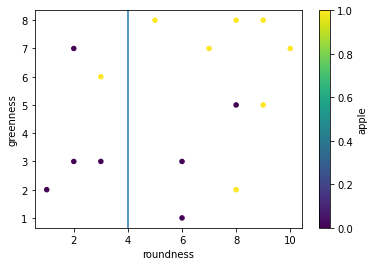

In [3]:
# Draw a plot with a boundary line at roundness=4
# Note: sharex is used because otherwise, the x axis doesn't show (side effect of using subplot in previous block)
fig=data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",sharex=False)
_=fig.axvline(x=4)

Similarly as before, we can now calculate the entropy for the left and the right split:

**Left:**

$p_{apple}=\frac{1}{5}=0.20$

$p_{not-apple}=\frac{4}{5}=0.80$

$H_{left} = -(0.20*log_2(0.20)+0.80*log_2(0.80)) = 0.72$

**Right:**

$p_{apple}=\frac{7}{10}=0.70$

$p_{not-apple}=\frac{3}{10}=0.30$

$H_{right} = -(0.70*log_2(0.70)+0.30*log_2(0.30)) = 0.88$

**Total entropy after split:**

The total entropy is calculated as the sum of the weighted entropies:

$H_{total}=\frac{\#left}{\#total}*H_{left} + \frac{\#right}{\#total}*H_{right}$

$H_{total}=\frac{5}{15}*0.72 + \frac{10}{15}*0.88$ = 0.8267

**Information gain:**

$IG = H_{before\_split} - H_{after\_split}$

$IG = 0.9974 - 0.8267 = 0.1707$


Let's try another split: greenness = 4

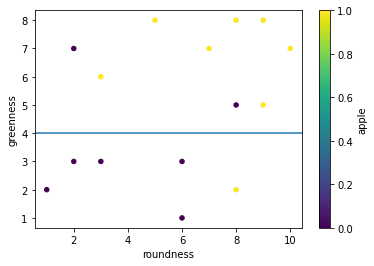

In [4]:
# Draw a plot with a boundary line at greenness=4
fig=data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",sharex=False)
_=fig.axhline(y=4)

**top:**

$p_{apple}=\frac{7}{9}=0.78$

$p_{not-apple}=\frac{2}{9}=0.22$

$H_{top} = -(0.78*log_2(0.78)+0.22*log_2(0.22)) = 0.76$

**bottom:**

$p_{apple}=\frac{1}{6}=0.17$

$p_{not-apple}=\frac{5}{6}=0.83$

$H_{bottom} = -(0.17*log_2(0.17)+0.83*log_2(0.83)) = 0.66$

**Total entropy after split:**

The total entropy is calculated as the sum of the weighted entropies:

$H_{total}=\frac{\#top}{\#total}*H_{top} + \frac{\#bottom}{\#total}*H_{bottom}$

$H_{total}=\frac{9}{15}*0.76 + \frac{6}{15}*0.66$ = 0.7200

**Information gain:**

$IG = H_{before\_split} - H_{after\_split}$

$IG = 0.9974 - 0.7200 = 0.2274$

---
Comparing the first and the second split:

$IG_{roundness=4}$ = 0.1707 | $IG_{greenness=4}$ = **0.2274**

The split based on the greenness has a higher information gain (and thus a lower entropy) so this is the better split of the two

## Gini impurity
Instead of calculating the entropy we can also make use of the gini impurity

Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance, if that new instance were randomly classified according to the distribution of class labels from the data set.

$G=1-\sum^N_{i=1}p_i^2$

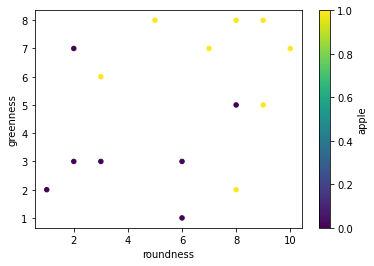

In [5]:
# The initial plot
_=data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",sharex=False)

For the dataset above:

$p_{apple}= 8/15 = 0.53$

$p_{not-apple}=7/15=0.47$

$G= 1-(0.53^2 + 0.47^2) = 0.4982$

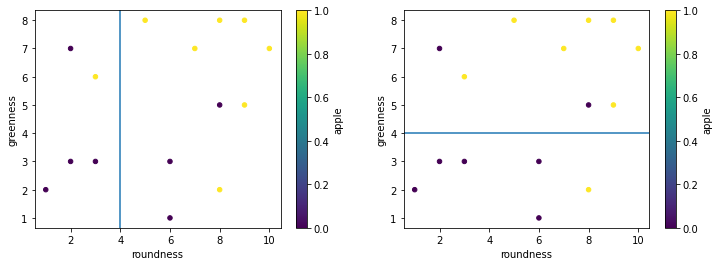

In [6]:
# Again draw the same splits as before:
fig = plt.figure(figsize=plt.figaspect(0.33))

ax = fig.add_subplot(1,2,1)
data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",ax=ax)
ax.axvline(x=4)

ax = fig.add_subplot(1,2,2)
data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",ax=ax)
_=ax.axhline(y=4)

Based on our two splits from before:

roundness=4|left|right
:---|:---:|:---:
$p_{apple}$|$\frac{1}{5}$=**0.2**|$\frac{7}{10}$=**0.7**
$p_{not-apple}$|$\frac{4}{5}$=**0.8**|$\frac{3}{10}$=**0.3**
$G$|1-(0.20² + 0.80²)=**0.32**|1-(0.70² + 0.30²)=**0.42**

Weighted G = $\frac{5}{15} * 0.32 + \frac{10}{15} * 0.42 = 0.39$

|greenness=4|left|right|
|:---|:---:|:---:|
|$p_{apple}$|$\frac{7}{9}$=**0.78**|$\frac{1}{6}$=**0.17**|
|$p_{not-apple}$|$\frac{2}{9}$=**0.22**|$\frac{5}{6}$=**0.83**|
|$G$|1-(0.78² + 0.22²)=**0.34**|1-(0.17² + 0.83²)=**0.28**|

Weighted G = $\frac{9}{15} * 0.34 + \frac{6}{15} * 0.28 = 0.32$

=> 0.39>0.32 => choose the split with the **lowest Gini impurity**

Problem with decision trees: tendency to overfit

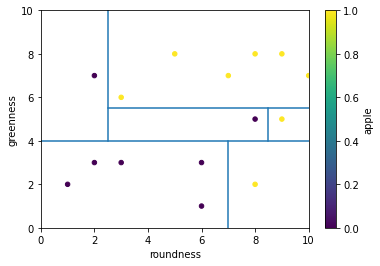

In [7]:
#Overfit example of a decision tree when you keep splitting up:
plot=data.plot(x="roundness",y="greenness",c="apple",cmap="viridis",kind="scatter",sharex=False,ylim=(0,10),xlim=(0,10))
# The splitting lines:
plot.axhline(y=4)
plot.axvline(x=7,ymin=0,ymax=0.4)
plot.axvline(x=2.5,ymin=0.4,ymax=1)
plot.axhline(y=5.5,xmin=0.25,xmax=1)
plot.axvline(x=8.5,ymin=0.4,ymax=0.55)

The tree of the above example would look something like this:

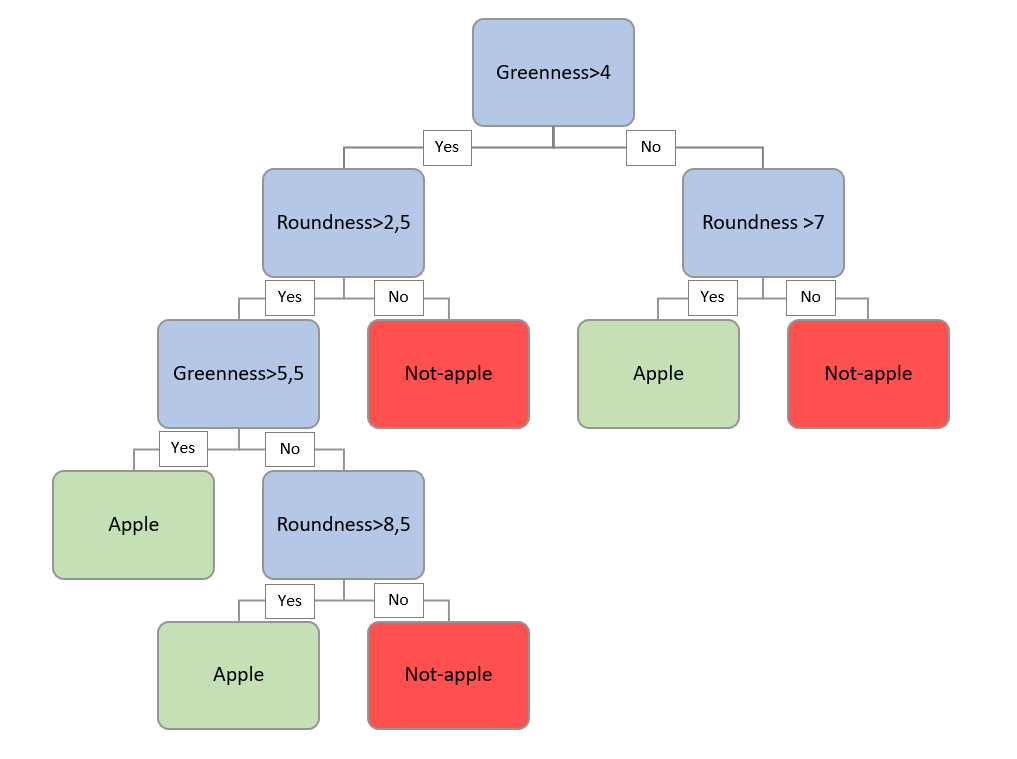


---
=> Solution to overfitting: **Majority voting**

What if instead of making one tree, we make multiple trees that are trained on different subsets of our training data!

multiple trees on random data -> **Random forest trees**

## Random forest trees
Train `n` estimators on a dataset. Look what the decission is that gets made the most.

For example, if you have 100 trees, 60 of them say it's class 1 and 40 say it's class 2 => majority = class 1


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Features and target
X= data.drop("apple",axis=1)
y= data["apple"]

# Random forest model
model=RandomForestClassifier(n_estimators=10,      #How many trees should be constructed?
                             criterion="gini",     #Default is gini
                             max_depth=2,          #How many layers is our tree allowed to have?
                             bootstrap=False       #Whether or not use bagging, default: true
                            )

# Fit on our data (all data because very few data points)
model.fit(X,y)
print("Score:",model.score(X,y))

Score: 0.9333333333333333


Let's look at 1 of the 10 trees


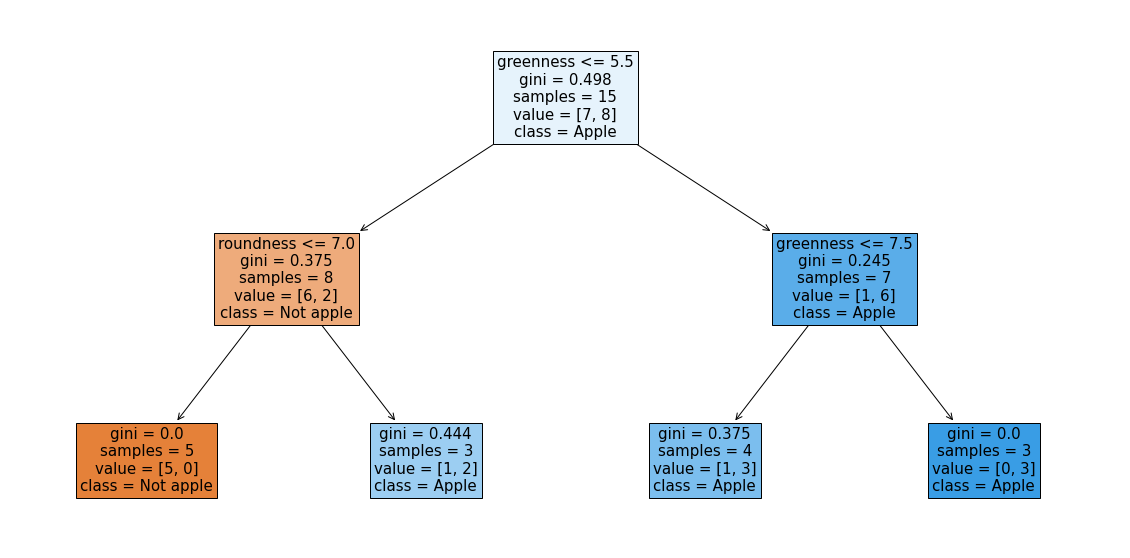

In [14]:
print("Let's look at 1 of the 10 trees")
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,1,1)

#Change the 0 to another number to see another tree of this model
_=plot_tree(model.estimators_[0],feature_names=X.columns,class_names=["Not apple","Apple"],fontsize=15,ax=ax, filled=True)

In [15]:
# Predict an object of roundness 4 and greenness 4
test_object = np.array([4,4])
print("Object with roundness 4 and greenness 4:",model.predict(test_object.reshape(1,-1)))
print(model.predict_proba(test_object.reshape(1,-1)))

# Predict an object of roundness 6 and greenness 8
test_object = np.array([6,8])
print("Object with roundness 6 and greenness 8:",model.predict(test_object.reshape(1,-1)))
print(model.predict_proba(test_object.reshape(1,-1)))

Object with roundness 4 and greenness 4: [0]
[[0.88666667 0.11333333]]
Object with roundness 6 and greenness 8: [1]
[[0.25333333 0.74666667]]


## Iris dataset

In [16]:
# Load in the data and take a look at the first rows
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Drop the ID column
data.drop("Id",axis=1,inplace=True)

In [18]:
# Split into features and targets
X=data.drop("Species",axis=1)
y=data.Species

In [19]:
# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
#Create a random forest model
model=RandomForestClassifier(n_estimators=10,      #How many trees should be constructed?
                             max_depth=2,
                             max_features=1,
                             max_samples=75
                            )
# Fit the data
model.fit(X_train,y_train)
# Show score on test set
print("Score:",model.score(X_test,y_test))

Score: 0.9666666666666667


In [39]:
# Show confusion matrix and classification report
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Interesting hyperparameters of random forest trees
* n_estimators:      number of trees in the forest (more = better)
* criterion:         `gini` or `entropy`
* max_features:      the maximum amount of features a single tree can use
    * int:    the number of features
    * float:  the percentage of features
    * 'auto': square root of the total number of features  => Default
    * 'sqrt': same as auto
    * 'log2': log2 of the total number of features
    * None:   all features are used
* max_depth:         the maximum depth the tree is allowed to have. Keep this limited with noisy data
* min_samples_split: minimum number of samples needed to keep creating a new split
* min_samples_leaf:  minimum number of samples that need to be in a leaf (higher = less prone to overfitting)
* bootstrap:         = bagging. Default: True

# Ensemble learning
## What is ensemble learning?
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.

They often work better than a single classifier.

Interesting to read: 
- https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
- https://medium.com/@mygreatlearning/everything-you-need-to-know-about-ensemble-learning-eed79a704a45

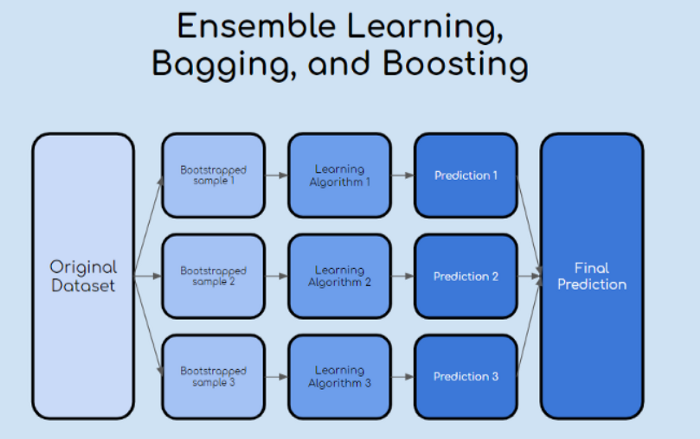

Three different types of ensemble learning:
* Stacking
* Bagging
* Boosting

---

### Stacking
Stacking uses a combination of (often different) types of models (for example, a decision tree + Naive bayes + Logistic regression + ...) and sends the output of each of the models to a final model (can be any classifier) that will predict the final class.

Random forest trees are an example of stacking (when bootstrap=False). Our final model in this case would be majority voting that will give us the answer.

All training data is used for every classifier.
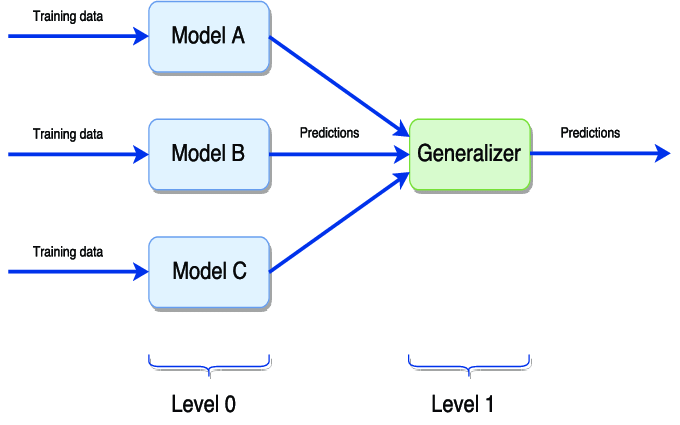

### Bagging
Bagging is a method to reduce variance and prevent overfitting. It is short for Bootstrap aggregating.

Often it is the same classifier type that is used (only decision trees or naive bayes or logisitc regression or...)

Random forest trees are an example of bagging (when bootstrap=True)

We create "bags" of different subsets of the initial data. Different bags can contain the same samples. We train each model on a bag.

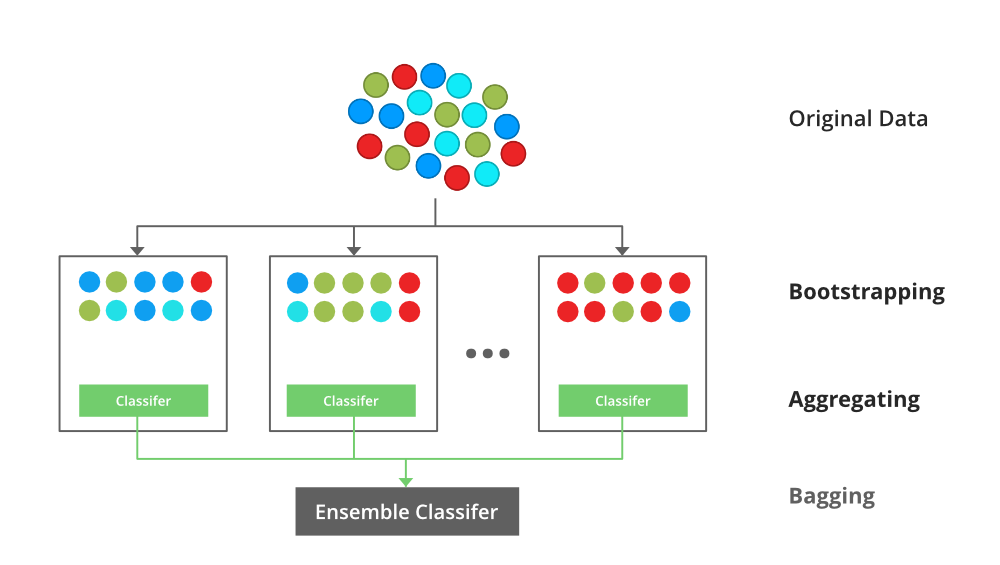

### Boosting
Boosting is similar to bagging, but wrongly classified samples during training will have a higher chance to be in the next training "bag". 

Often this will have a better accuracy than bagging, but is more difficult to prevent overfitting and to parallelize.

Most known algortithm is "AdaBoost" (Adaptive Boosting)
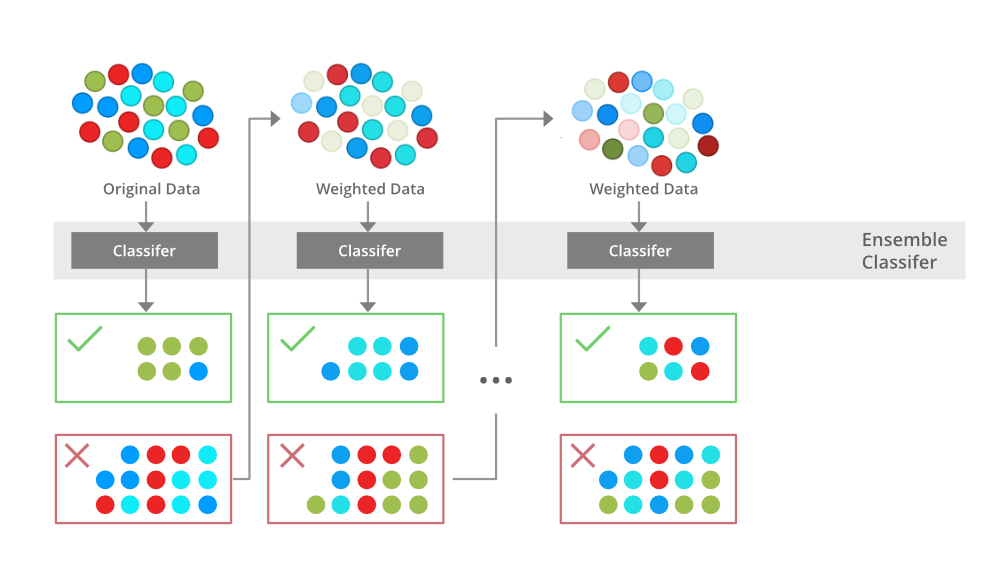

### Bagging with sklearn

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
# Bagging with logistic regression

number_of_estimators = 100
complexity = 5
# The base model our bagging model will be using, this could also be any other classifier we have seen.
# The example here will be logistic regression
baseModel = LogisticRegression(C=complexity,solver='liblinear')

# Create a baggingClassifier model based on the base model, we only allow each model to use 2 features (total example = 4)
# So different models are allowed to have other features.
lregbagging = BaggingClassifier(base_estimator=baseModel, n_estimators=number_of_estimators,max_features=2)
# Fit our training data
lregbagging.fit(X_train,y_train)
# Predict testing data
y_pred = lregbagging.predict(X_test)

# Scores
print("With bagging (100 models)")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print("="*80)

# Let's now train 1 baseModel on all 4 features
print("With just 1 baseModel trained on the data")
baseModel.fit(X_train,y_train)
y_pred = baseModel.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

With bagging (100 models)
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
With just 1 baseModel trained on the data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]


### Boosting with sklearn

In [57]:
from sklearn.ensemble import AdaBoostClassifier
# When not specifying a specific base estimator, a DecisionTreeClassifier is used (One tree). 
clf_adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.9)
# Fit data
clf_adaboost.fit(X_train,y_train)
# Predict testing data
y_pred = clf_adaboost.predict(X_test)

# Print the scores
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [66]:
# Similarly to bagging, we can also use for example logistic regression or naive bayes
Complexity=10
baseModel= LogisticRegression(C=Complexity, solver='liblinear')
clf_adaboost = AdaBoostClassifier(base_estimator=baseModel, n_estimators=150,learning_rate=0.01)
# Fit data
clf_adaboost.fit(X_train,y_train)
# Predict testing data
y_pred = clf_adaboost.predict(X_test)

# Print the scores
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]


### Stacking with sklearn

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


estimators = [('logisticModel',LogisticRegression(C=10, solver='liblinear')),
              ('nbModel',MultinomialNB(alpha=1)),
              ('dtModel',DecisionTreeClassifier(max_depth=1))] #Note: this is a single tree,but you could also use an
                                                               #      entire random forest classifier! This one can also
                                                               #      only use have a single decision!

stackClassifier = StackingClassifier(estimators=estimators)
# Fit data
stackClassifier.fit(X_train,y_train)
# Predict testing data
y_pred = stackClassifier.predict(X_test)

# Print the scores
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
